<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#Deprecated" data-toc-modified-id="Deprecated-5">Deprecated</a></span></li><li><span><a href="#Correlation-with-T-cell-scores" data-toc-modified-id="Correlation-with-T-cell-scores-6">Correlation with T cell scores</a></span></li><li><span><a href="#Score-neurons" data-toc-modified-id="Score-neurons-7">Score neurons</a></span></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(ggsignif)

# Functions

In [3]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src//color_schemes.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"

In [5]:
mountpath <- "/Users/anabbi/sbfs_mount/projects/cavatica/9zrh-gcct/"

# Main

In [6]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [7]:
load(file = paste0(datapath,"snv/total_mut_manifest_estimate.RData"))

In [8]:
ped_tmb <- total_mut_manifest_estimate[ total_mut_manifest_estimate$group != "TCGA",]

In [9]:
ped_tmb_IC <- merge(ped_tmb, metadata_IC[,c("sample_id", "immune_cluster", "tumour_subtype")], by = "sample_id")

In [10]:
table(ped_tmb_IC$cohort)


  ATRT     CP    CPH    EPN   ETMR     MB    MNG    NBL    NFB pedHGG pedLGG 
    29     13     19     52      9    191     11    100      7     63    257 
  SCHW 
    12 

In [11]:
nbl <- ped_tmb_IC[ ped_tmb_IC$group == "TARGET",]

In [12]:
tcra_metadata <- read.csv(paste0(datapath, "TcellExtrect/manifest_20211116_142621.csv"), header = T, stringsAsFactors = F)

In [13]:
tcra_metadata <- tcra_metadata[,c("sample_id", "name")]

In [14]:
tcra_metadata$bamfile <- gsub("_TCRA.out", "", tcra_metadata$name)
tcra_metadata$bamfile <- gsub(".*/", "", tcra_metadata$bamfile)

In [27]:
tcra.files <- list.files(mountpath, pattern = "_TCRA.out")

In [28]:
tcra.files

[1] "0003f931-3c78-572b-9414-383e412a49fc_wxs_gdc_realn.bam_TCRA.out"
  [2] "00159bd4-32a0-5203-ae62-7c1be50c5976_wxs_gdc_realn.bam_TCRA.out"
  [3] "0065ce4f-594d-5513-81a9-84b116a35855_wxs_gdc_realn.bam_TCRA.out"
  [4] "010f264e-f9ff-55c1-b75c-373778a455cf_wxs_gdc_realn.bam_TCRA.out"
  [5] "01a55847-af41-41da-a45e-60e1098b51fb_wxs_gdc_realn.bam_TCRA.out"
  [6] "020dcf01-372e-5a6c-98a2-2062b1b6584a_wxs_gdc_realn.bam_TCRA.out"
  [7] "022e9ba2-a429-4066-8474-31b342bdf0c7_wxs_gdc_realn.bam_TCRA.out"
  [8] "02d01637-1214-4d81-a142-1ed88e63312a_wxs_gdc_realn.bam_TCRA.out"
  [9] "042d5a98-1fa7-51f0-8a14-3119ee7784c2_wxs_gdc_realn.bam_TCRA.out"
 [10] "069bd896-5d09-4f9c-99c6-4e8628bde39c_wxs_gdc_realn.bam_TCRA.out"
 [11] "06ec739d-3927-5d04-9477-03ac0b386b3d_wxs_gdc_realn.bam_TCRA.out"
 [12] "07a5b842-f543-42da-824c-657010cfd32d_wxs_gdc_realn.bam_TCRA.out"
 [13] "07c78077-72ce-5837-bd42-08c60ac4e330_wxs_gdc_realn.bam_TCRA.out"
 [14] "081e9fc7-587a-5714-b099-641a97974ad6_wxs_gdc_realn.bam_TCRA.out"
 [15] "087a2909-4747-4e32-97db-179f78d004df_wxs_gdc_realn.bam_TCRA.out"
 [16] "08b61267-9fdc-5c6a-bf85-236fb8057778_wxs_gdc_realn.bam_TCRA.out"
 [17] "08dbdad5-4588-5cac-910c-a782cc5a65c9_wxs_gdc_realn.bam_TCRA.out"
 [18] "0905b118-8a6b-5698-8bd8-5f3de35eebd6_wxs_gdc_realn.bam_TCRA.out"
 [19] "09e3e4a1-85b0-52da-976f-f67d55ec8bdf_wxs_gdc_realn.bam_TCRA.out"
 [20] "0a3f8428-6ebe-4793-b0b0-c67832b19857_wxs_gdc_realn.bam_TCRA.out"
 [21] "0b3360b3-b046-5029-929a-fe1e0e6c611e_wxs_gdc_realn.bam_TCRA.out"
 [22] "0b5e21df-c174-4b1e-a4a8-41cdd062bd66_wxs_gdc_realn.bam_TCRA.out"
 [23] "0ba33ea8-7481-5216-b151-608a545a639d_wxs_gdc_realn.bam_TCRA.out"
 [24] "0baa5861-4529-5fe4-9570-afe29b6c6a0d_wxs_gdc_realn.bam_TCRA.out"
 [25] "0d0f2413-21c2-5601-86be-597dd9c77658_wxs_gdc_realn.bam_TCRA.out"
 [26] "0d27f179-49a5-54af-909f-6eb07bef2f0a_wxs_gdc_realn.bam_TCRA.out"
 [27] "0e1c83ec-dac8-4863-ab2f-61607f6b9fcc_wxs_gdc_realn.bam_TCRA.out"
 [28] "0ef5bf26-f9b4-55ef-b5e0-4e0f22c3cc9e_wxs_gdc_realn.bam_TCRA.out"
 [29] "0f88d031-0fe3-4d5a-8153-eeb031313ab0_wxs_gdc_realn.bam_TCRA.out"
 [30] "1065c49e-356d-4357-97d0-16a157aeed45_wxs_gdc_realn.bam_TCRA.out"
 [31] "10881e44-14dc-447c-8155-5fe42a3553c4_wxs_gdc_realn.bam_TCRA.out"
 [32] "10a6932f-274c-5dbb-9744-518a4a9b1d26_wxs_gdc_realn.bam_TCRA.out"
 [33] "10bcb222-c711-56ab-adc4-2b176d86eb60_wxs_gdc_realn.bam_TCRA.out"
 [34] "12d801ae-c36e-52f6-b788-dc558ac0fd77_wxs_gdc_realn.bam_TCRA.out"
 [35] "132e1d07-accb-4af5-abcb-f8d3bb90f4e3_wxs_gdc_realn.bam_TCRA.out"
 [36] "134d51e5-a0d7-5852-8a3a-136ad2705216_wxs_gdc_realn.bam_TCRA.out"
 [37] "13ac684b-4cb7-500f-b3bf-11aafe228911_wxs_gdc_realn.bam_TCRA.out"
 [38] "146bdffb-1376-5958-a3ce-2c58d5b01367_wxs_gdc_realn.bam_TCRA.out"
 [39] "152dd5d9-8500-48db-8092-0468b45a6a1e_wxs_gdc_realn.bam_TCRA.out"
 [40] "170ffeb1-33bf-42bc-bc93-1f1907186c66_wxs_gdc_realn.bam_TCRA.out"
 [41] "1904ba1e-d545-5657-885a-338d4b17b8bd_wxs_gdc_realn.bam_TCRA.out"
 [42] "19371d1d-d722-49d0-a183-babb0576cd43_wxs_gdc_realn.bam_TCRA.out"
 [43] "19372d04-d6fd-500a-b93b-308f1a9f82ba_wxs_gdc_realn.bam_TCRA.out"
 [44] "196c77fb-6d2d-4df2-9c38-9e9c4c92039d_wxs_gdc_realn.bam_TCRA.out"
 [45] "19a61889-89af-4df6-8405-eaf2e354ad51_wxs_gdc_realn.bam_TCRA.out"
 [46] "1a89ca65-da87-5ecf-8be7-a2fdea858eb8_wxs_gdc_realn.bam_TCRA.out"
 [47] "1aac02b5-375f-54c5-a796-5443e1759afd_wxs_gdc_realn.bam_TCRA.out"
 [48] "1c6e0462-0b17-4cd8-a0c5-4b75a8b0d5d7_wxs_gdc_realn.bam_TCRA.out"
 [49] "1f6f7ca8-49fb-4697-819c-049ad0e2ed71_wxs_gdc_realn.bam_TCRA.out"
 [50] "1faae246-efdd-43b0-9f12-cacfe076b593_wxs_gdc_realn.bam_TCRA.out"
 [51] "20dc0ddc-a2f1-5949-8143-55d0d1bb3c5f_wxs_gdc_realn.bam_TCRA.out"
 [52] "2231e1d9-39c7-5508-9ffa-7c672ad78715_wxs_gdc_realn.bam_TCRA.out"
 [53] "229588bc-988a-5034-9685-6bacc844d541_wxs_gdc_realn.bam_TCRA.out"
 [54] "233ce5f7-16f5-5627-9f1d-aae11b1b13c0_wxs_gdc_realn.bam_TCRA.out"
 [55] "234d0d9f-ef09-5ede-9248-039370c5db4f_wxs_gdc_realn.bam_TCRA.out"
 [56] "238fab2a-1e22-5235-a4b2-3d5a901c86b

In [29]:
tcra_list <- lapply(tcra.files, function(x){ 
    read.table(paste0(mountpath, x), sep = "\t", header = T, stringsAsFactors = F)})

In [30]:
tcra_list[16]

x
<lgl>
NA


In [31]:
length(tcra_list)

[1] 370

In [32]:
tcra_list <- tcra_list[sapply(tcra_list, function(x) length(unlist(x))) == 5]

In [33]:
length(tcra_list)

[1] 338

In [34]:
all_tcra <- do.call("rbind", tcra_list)

In [35]:
all_tcra$sample_id <- tcra_metadata$sample_id[match(all_tcra$sample, tcra_metadata$bamfile)]

In [36]:
nbl$Tcellfraction <- all_tcra$TCRA.tcell.fraction[match(nbl$sample_id, all_tcra$sample_id)]
nbl$qcfit <- all_tcra$qcFit[match(nbl$sample_id, all_tcra$sample_id)]

Warning message:
“Removed 28 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 28 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 28 rows containing non-finite values (stat_signif).”
Warning message:
“Removed 28 rows containing non-finite values (stat_signif).”
Warning message:
“Removed 28 rows containing non-finite values (stat_signif).”


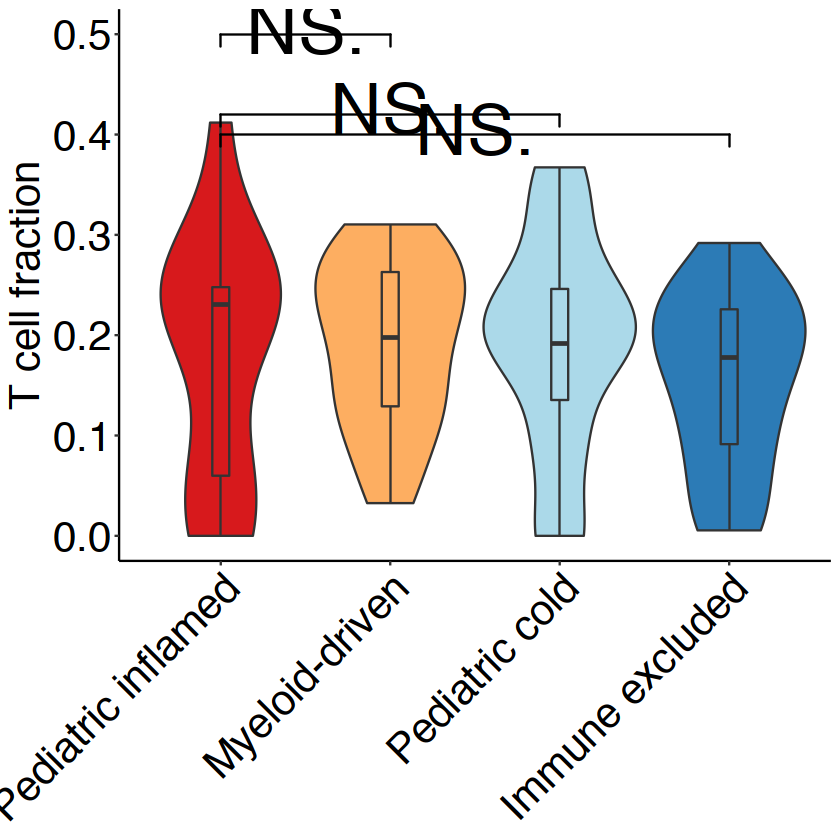

In [51]:
tcellplot <- ggplot(data = nbl,
                 aes(x = immune_cluster, y = Tcellfraction, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + 
myaxis + myplot +
scale_fill_manual(values = cluster_col) +
theme(legend.position = "none", axis.title.x = element_blank()) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Myeloid-driven")), y_position = 0.5,
                     map_signif_level=TRUE, textsize = 15, test = "t.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Pediatric cold")), y_position = 0.42,
                     map_signif_level=TRUE, textsize = 15, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Immune excluded")), y_position = 0.4,
                     map_signif_level=TRUE, textsize = 15, test = "wilcox.test", vjust = 0.5) +
labs(y = "T cell fraction")

tcellplot

In [38]:
pdf(paste0(plotpath, "tcellextrect_IC_plot.pdf"),
   width = 10, height = 12)

print(tcellplot)

dev.off()

Warning message:
“Removed 28 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 28 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 28 rows containing non-finite values (stat_signif).”
Warning message:
“Removed 28 rows containing non-finite values (stat_signif).”
Warning message:
“Removed 28 rows containing non-finite values (stat_signif).”


pdf 
  2

# Correlation with T cell scores

In [39]:
load(file = paste0(datapath, "TME_clusters/geneset_cc_norm.RData"))

In [40]:
head(geneset_cc_norm)

,TARGET-30-PAIFXV-01A,TARGET-30-PAIPGU-01A,TARGET-30-PAISNS-01A,TARGET-30-PAITCI-01A,TARGET-30-PAIVHE-01A,TARGET-30-PAIXIF-01A,TARGET-30-PAKYZS-01A,TARGET-30-PAKZRH-01A,TARGET-30-PALBFW-01A,TARGET-30-PALCBW-01A,⋯,ICGC_PA89,ICGC_PA9,ICGC_PA91,ICGC_PA92,ICGC_PA93,ICGC_PA94,ICGC_PA95,ICGC_PA96,ICGC_PA97,ICGC_PA99
B_cells,-1.0261811,-0.2663472,-0.5500331,-1.6734032,0.3790016,-0.68443148,-2.3938567,-2.3391479,-0.69584948,-0.1989627,⋯,-0.4294500,-0.1895001,-0.08708725,-0.24467422,0.18449614,-0.3363069,-0.009581817,-0.5669550,-0.008541654,-0.2312175
Granulocytes,1.0154032,1.5352628,0.3735776,1.1657142,1.0875300,1.62840168,0.8566935,0.5867553,0.59711497,1.4388706,⋯,0.5986012,0.9764662,1.09418248,1.20580307,1.59507546,0.6462704,1.014127410,1.1984187,1.623139948,1.1852914
Monocytes,1.1560147,3.2377299,-0.1424045,1.3159159,1.0783997,2.24252540,0.5307257,1.1801533,0.44303005,1.3987383,⋯,0.7337680,1.6864077,1.59960434,1.02899639,2.71492144,1.0711519,2.012054482,1.1595255,1.927787219,1.9380339
DC,0.6116269,1.7166637,0.3242817,0.9269765,0.8864241,1.20057021,0.2268468,-0.1522459,0.49141649,1.3751148,⋯,0.2025195,0.4377004,0.82783742,0.31070266,1.28033748,0.4651458,0.843106181,0.5533022,0.503512791,0.9905531
NK_cells,0.5080152,1.2370455,-0.2447717,-0.4259744,0.3518645,-0.08196236,-1.5027704,-1.5369380,0.36873168,-0.0508021,⋯,-0.7132550,-0.3555373,0.11713649,0.03383472,-0.06413519,-0.9230160,-0.259694051,-0.3449225,0.145732336,-0.0730824
T_cells,0.1329171,1.2636560,0.5094226,-0.0656706,0.7437377,0.05919117,-1.6221636,-1.8604589,0.07688679,0.1175262,⋯,-0.6417722,-0.2823479,-0.21028556,-0.16341890,0.09400842,-0.6638549,0.068445412,-0.5339814,-0.247713121,-0.1558411


In [41]:
geneset_nbl <- geneset_cc_norm[, colnames(geneset_cc_norm)[grepl("TARGET", colnames(geneset_cc_norm))]]

In [43]:
nbl$T_cells <- geneset_nbl["T_cells", colnames(geneset_nbl)[match(nbl$sample_id,colnames(geneset_nbl))]]

In [46]:
til_vs_immunescore <- ggplot(data = nbl,
                 aes(x = ImmuneScore, y = Tcellfraction, color = immune_cluster)) + 
geom_point(size = 5) + myplot + myaxis + 
theme(legend.position = "none", legend.title = element_blank(),
     axis.title.x = element_blank())

Warning message:
“Removed 28 rows containing missing values (geom_point).”


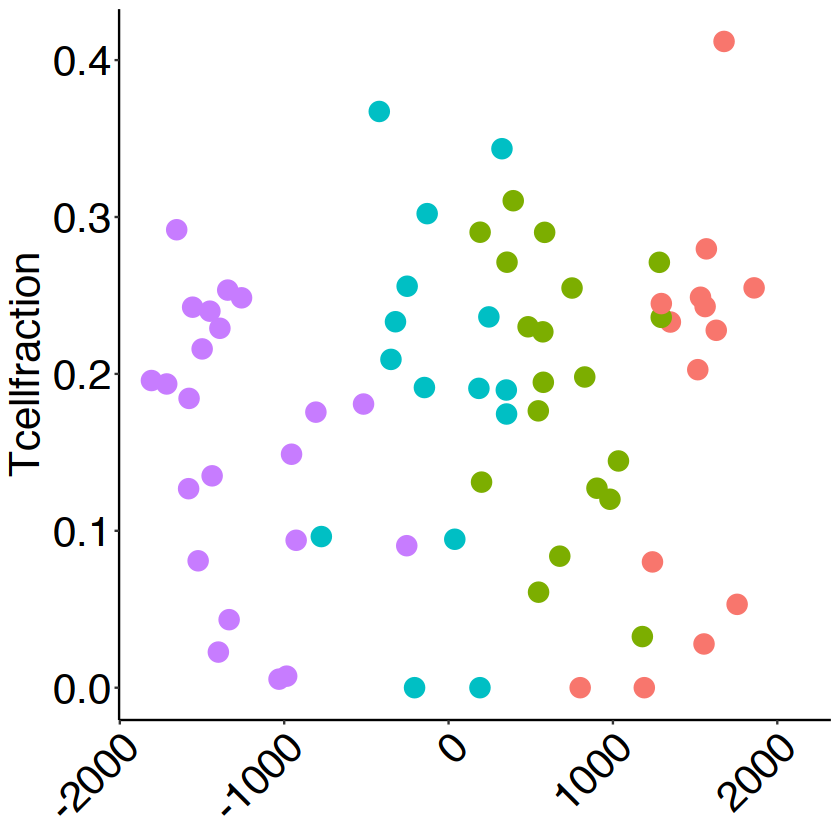

In [47]:
til_vs_immunescore

Warning message:
“Removed 28 rows containing missing values (geom_point).”


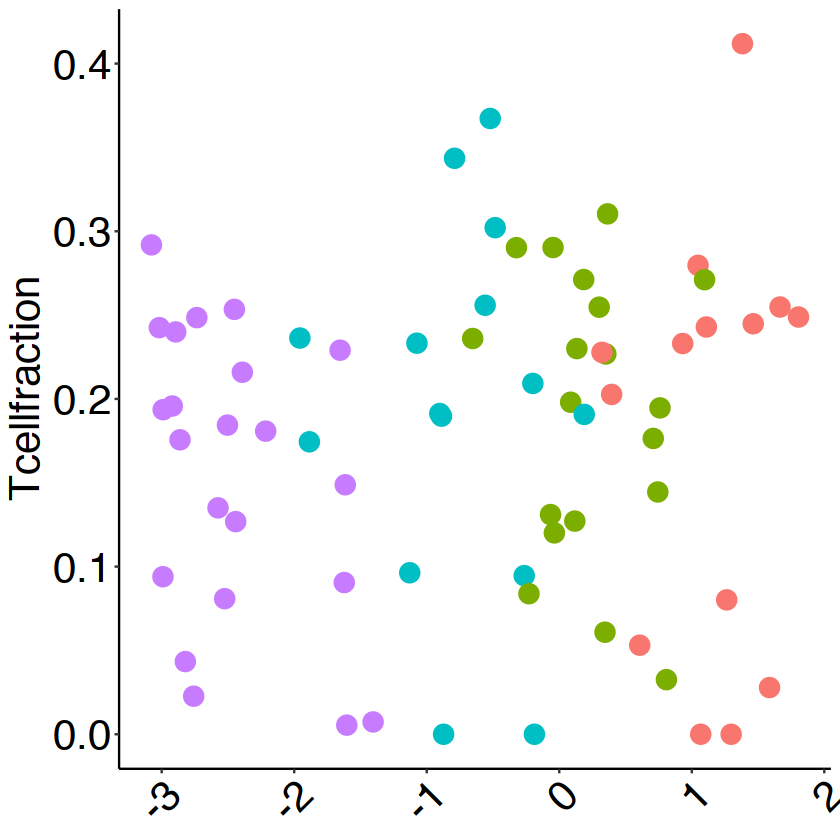

In [45]:
til_vs_immunescore

In [25]:
pdf(paste0(plotpath, "HE_vs_immuneclusters.pdf"),
   width = 12, height = 10)

print(til_vs_immunescore)

dev.off()

pdf 
  2